<a href="https://colab.research.google.com/github/jorobledo/curso_visualizacion/blob/master/Clase01_Trayecto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

<h1> Herramientas para la visualización de datos </h1>

<h2> Academia Data Driven: Módulo 3 - Unidad 3 <h2>

Docente: <a href= "https://jorobledo.github.io/"> José Ignacio Robledo </a>
</center>

## *Temario*
### Clase 1
- Visualización de datos numéricos: datos, mapas, gráficos, uso de glyphs, gráficos apilados.

### Clase 2
- Visualización de datos no numéricos: gráficos, redes, gráficos de componentes principales, árboles, escalado multidimensional.

### Clase 3
- Reportes, dashborads y otros recursos.

- Comunicación de datos


## Introducción

### Criterio a la hora de armar una figura

<center>
<img src=https://clauswilke.com/dataviz/introduction_files/figure-html/ugly-bad-wrong-examples-1.png width=600>
</center>

Figura 1: Extraída de [1]. Ejemplo de figuras estéticamente feas, malas, e incorrectas. a.) Imagen razonable. b.) Una versión que no resulta agradable a la vista de (a). Aunque no está mal, los colores son muy brillantes y no son útiles. El fondo es demasiado fuerte y el texto está escrito con distintas fuentes. c.) Una versión mala de (a). Cada barra tiene su propio eje con distinta escala. Esto puede hacer que la figura engañe. d.) Una versión incorrecta de (a). No tiene eje explícito de las $y$. 


### Variaciones para mejorar la visualización:

<center>
<img src=https://clauswilke.com/dataviz/aesthetic_mapping_files/figure-html/common-aesthetics-1.png width=600>
</center>
Figura 2: Algunas de las distintas variables con las que se puede jugar al diseñar un gráfico (en inglés llamados *aesthetics*). 


### Ejes de coordenadas

- Ejes cartesianos

- Ejes transformados (logaritmo)

- Ejes polares


### Tipo de dato acota tipo de gráfico posible

Los datos, ¿Numéricos o categóricos?¿Son continuos o discretos? ¿binarios o multiclase?

<a href="https://raw.githubusercontent.com/Financial-Times/chart-doctor/main/visual-vocabulary/poster.png"> <img src=https://raw.githubusercontent.com/Financial-Times/chart-doctor/main/visual-vocabulary/poster.png> </a>



### Paquetes de Python que utilizaremos para graficar

- [matplotlib](https://matplotlib.org/): Copia el estilo de gráficos y la lógica de implementación de Matlab. Es la librería estándar de graficación en Python y está ampliamente documentada.

- [seaborn](https://seaborn.pydata.org/): Paquete basado en matplotlib que sirve para combinar con Pandas. Está pensado para graficar datos estadísticos. 

- [plotly](https://plotly.com/): Permite gráficos interactivos de manera sencilla y generación de dashboards. 

- [bokeh](http://bokeh.org/): Permite gráficos interactivos de manera sencilla y generación de dashboards.

#### Alguno paquetes auxiliares que utilizaremos para manipulación de datos

- [numpy](https://numpy.org/) : Viene de '**Num**erical **Py**thon'. Posibilita gran cantidad de operaciones numéricas en Python. Especialmente útil para trabajar con objetos `numpy.array`, donde las operaciones están definidas con el fin de ser intuitivas para el usuario.  

- [pandas](https://pandas.pydata.org/) : Viene de '**Pan**el **Da**ta'. Sirve para trabajar conm `pandas.DataFrame` y `pandas.Series`. Habilita gran cantidad de métodos sobre dataframes y series. 

#### Algunos paquetes donde encontraremos algoritmos útiles

- [scikit-learn](https://scikit-learn.org/stable/): Engloba una gran cantidad de algoritmos de aprendizaje automático supervisado y no supervisado, como también metodos de exploración de datos multivariantes. 

- [scipy](https://scipy.org/): Viene de '**Sci**entific **Py**thon' Ofrece módulos para trabajar con métodos estadísticos y módulos de optimización de funciones, entre otras herramientas.

In [ ]:
# Para graficar
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bk
from bokeh.io import output_notebook
output_notebook()
# Para manipulación de datos
import pandas as pd
import numpy as np

# Para algoritmos
import sklearn
import scipy

## Preparación de datos para graficar

Cada paquete ha sido programado para interpretar los datos de entrada de una manera específica. Mientras que hay algunos paquetes como `matplotlib` que recien los datos ya sea en listas, arrays, o dataframes, hay otros como `seaborn` que están pensados para trabajar específicamente con `DataFrames`. Por ende, debemos siempre preparar los datos acorde al paquete que deseemos utilizar.  

Comenzaremos con un caso sencillo en donde armaremos una tabla de datos utilizando `pandas.Series` y `pandas.DataFrame`:

In [ ]:
x = pd.Series(range(1,6), name='x')
print(x)
print(f'Hay {x.shape[0]} datos  en esta serie.')

0    1
1    2
2    3
3    4
4    5
Name: x, dtype: int64
Hay 5 datos  en esta serie.


Generaremos algunos datos sintéticos utilizando el método `np.random.normal`: 

In [ ]:
np.random.seed(0)
datos = pd.Series(np.random.normal(size=(x.shape)), name='Variable ficticia')
print(datos)
print('\n')
print(f'La media de los datos es {datos.mean():.2f} y su desvío estándar es {datos.std():.2f}.')
print(f'El valor máximo es {datos.max()} y el valor mínimo {datos.min()}. \n')

print(datos.describe())

0    1.764052
1    0.400157
2    0.978738
3    2.240893
4    1.867558
Name: Variable ficticia, dtype: float64


La media de los datos es 1.45 y su desvío estándar es 0.75.
El valor máximo es 2.240893199201458 y el valor mínimo 0.4001572083672233. 

count    5.000000
mean     1.450280
std      0.745445
min      0.400157
25%      0.978738
50%      1.764052
75%      1.867558
max      2.240893
Name: Variable ficticia, dtype: float64


Podemos armar el conjunto de datos utilizando `pd.DataFrame`:

In [ ]:
df = pd.DataFrame([x, datos]); df

,0,1,2,3,4
x,1.000000,2.000000,3.000000,4.000000,5.000000
Variable ficticia,1.764052,0.400157,0.978738,2.240893,1.867558


In [ ]:
df = df.T; df

,x,Variable ficticia
0,1.0,1.764052
1,2.0,0.400157
2,3.0,0.978738
3,4.0,2.240893
4,5.0,1.867558


In [ ]:
df.x = df.x.astype(int)

Podemos agregar nuevas columnas al dataframe:

In [ ]:
df['Variable**2'] = df['Variable ficticia']**2; df

,x,Variable ficticia,Variable**2
0,1,1.764052,3.111881
1,2,0.400157,0.160126
2,3,0.978738,0.957928
3,4,2.240893,5.021602
4,5,1.867558,3.487773


##  Matplotlib, Seaborn, Bokeh u otro?
Ya podemos graficar esta variable ficticia, utilizando el método incorporado en `pandas`, que está basado en `matplotlib`

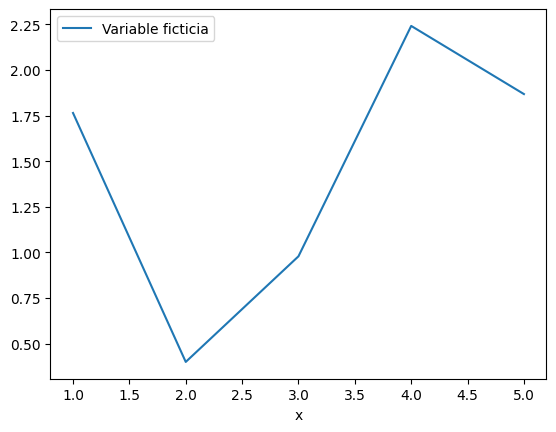

In [ ]:
df.plot(x='x',y='Variable ficticia')
plt.show()

Es exactamente lo mismo que hacer:

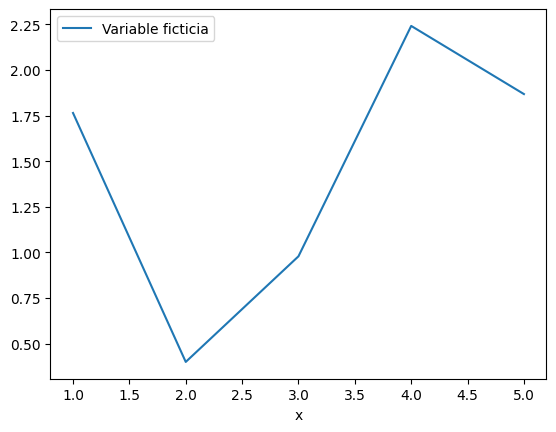

In [ ]:
# Versión matplotlib

# Inicializamos la figura
plt.figure()

# agregamos los trazos que querramos a la figura
plt.plot(df['x'], df['Variable ficticia'],  label='Variable ficticia')

# Modificamos propiedades de visualización de la figura
plt.xlabel('x')
plt.legend()

# Cerramos el gráfico y graficamos
plt.show()

O bien con seaborn:

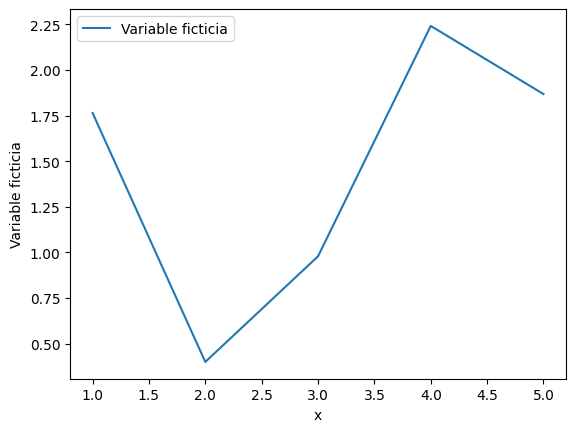

In [ ]:
# Podemos inicializar la figura (no es necesario)
plt.figure()

# Generamos figura con trazo y algunas propiedades por default
sns.lineplot(x='x', y='Variable ficticia', data=df, label='Variable ficticia')

# Podemos estilizar con matplotlib todo lo que querramos ya que el gráfico está
# basado en matplotlib.
plt.legend()
# Cerramos la figura y graficamos
plt.show()

O bien con `Bokeh`:

In [ ]:
# Iniciamos figura
p = bk.figure(width=600)

# Incluímos un trazo
p.line(x='x', y='Variable ficticia', source=df, line_width=4)

# Modificamos propiedades del gráfico
p.xaxis.axis_label = 'x'

# Graficamos
bk.show(p)

### Matplotlib

Vamos a empezar discutiendo algunas de las características más generales del trabajo con esta biblioteca y mostrar algún ejemplo relativamente sencillo. Matplotlib está dividido en tres partes o capas conceptualmente bien delimitadas:

- Una parte es la que hace el trabajo más pesado administrando cada parte del gráfico (líneas, texto, figuras, etc)

- Una segunda parte que permite un uso simple de las funciones anteriores: una interfaz con el usuario. Un ejemplo es el submódulo `pyplot`.

- Una tercera componente que se encarga de presentar la figura en el formato adecuado. Esto es lo que se llama el Backend y se encarga de mostrar la figura en los distintos sistemas de ventanas, o en formatos de archivos correspondientes. Algunos ejemplos de backend son: PS (copias PostScript®), SVG (Scalable Vector Graphics), Agg (salida PNG de muy buena calidad), Cairo (png, pdf, ps, svg), GTK (interactivo, permite integrar matplotlib con aplicaciones Gtk+, que usa GNOME), PDF, WxWidgets (interactivo), Qt (interactivo).

Nosotros vamos a concentrarnos principalmente en aprender a utilizar **pyplot**

Para trabajar en ipython notebooks suele ser conveniente realizar los gráficos dentro de la misma página donde realizamos los cálculos. Si esto no ocurre automáticamente, se puede obtener con la siguiente línea:

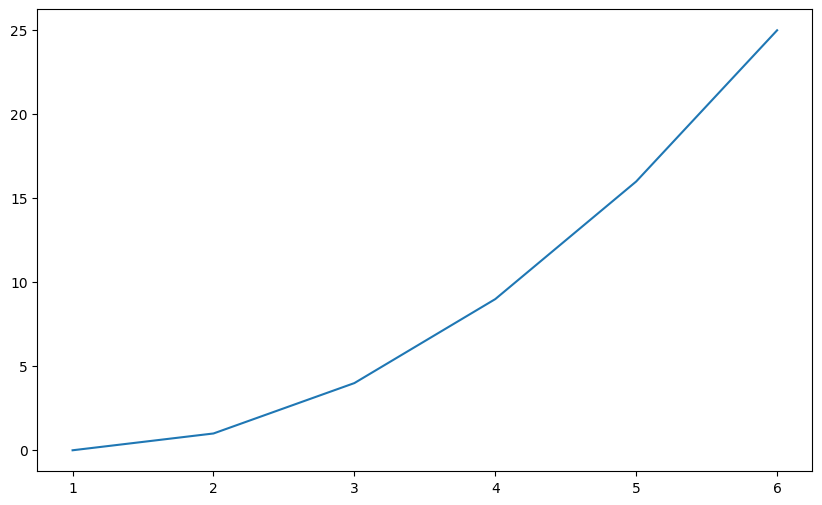

In [ ]:
import matplotlib.pyplot as plt
mpl.rc_file_defaults()
x, y = [1,2,3,4,5,6], [0,1,4,9,16,25]

plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.show()

Podemos modificar las líneas, los símbolos y los colores de cada trazo., por ejemplo:

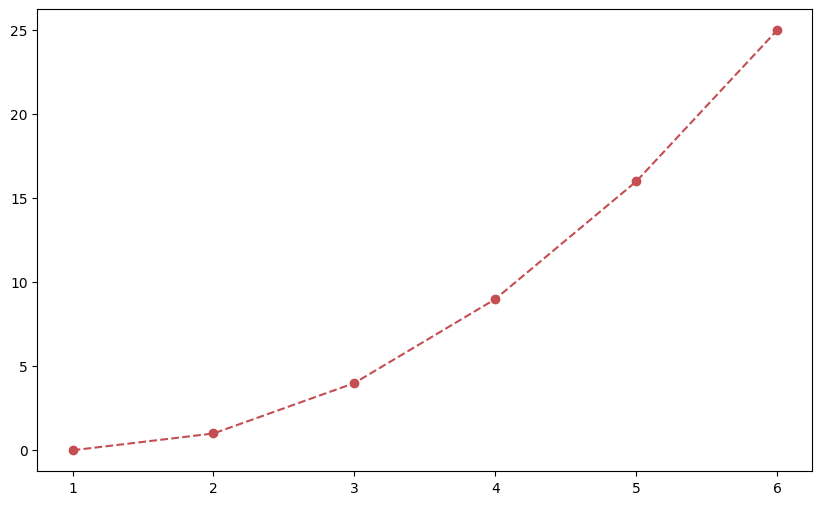

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x, y, 'ro--')
plt.show()

Una alternativa sería utilizar los *argumentos palabras claves* o **keyword arguments**, abreviado usualmente como **kwargs, para definir explícitamente el formato y el color 

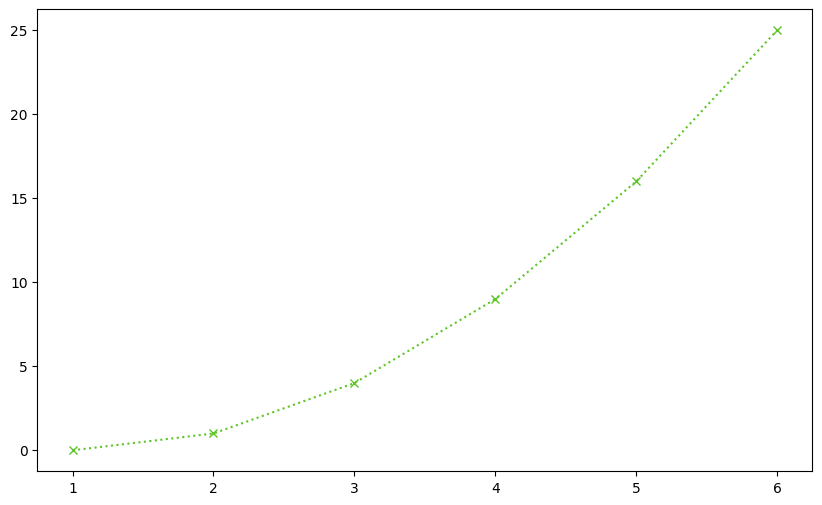

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x, y, 'x:', color='#5DC527')
plt.show()

 **Markers**
    
    =============    ===============================
    character        description
    =============    ===============================
    ``'.'``          point marker
    ``','``          pixel marker
    ``'o'``          circle marker
    ``'v'``          triangle_down marker
    ``'^'``          triangle_up marker
    ``'<'``          triangle_left marker
    ``'>'``          triangle_right marker
    ``'1'``          tri_down marker
    ``'2'``          tri_up marker
    ``'3'``          tri_left marker
    ``'4'``          tri_right marker
    ``'s'``          square marker
    ``'p'``          pentagon marker
    ``'*'``          star marker
    ``'h'``          hexagon1 marker
    ``'H'``          hexagon2 marker
    ``'+'``          plus marker
    ``'x'``          x marker
    ``'D'``          diamond marker
    ``'d'``          thin_diamond marker
    ``'|'``          vline marker
    ``'_'``          hline marker
    =============    ===============================
    
    **Line Styles**
    
    =============    ===============================
    character        description
    =============    ===============================
    ``'-'``          solid line style
    ``'--'``         dashed line style
    ``'-.'``         dash-dot line style
    ``':'``          dotted line style
    =============    ===============================
    
    Example format strings::
    
        'b'    # blue markers with default shape
        'or'   # red circles
        '-g'   # green solid line
        '--'   # dashed line with default color
        '^k:'  # black triangle_up markers connected by a dotted line
    
    **Colors**
    
    The supported color abbreviations are the single letter codes
    
    =============    ===============================
    character        color
    =============    ===============================
    ``'b'``          blue
    ``'g'``          green
    ``'r'``          red
    ``'c'``          cyan
    ``'m'``          magenta
    ``'y'``          yellow
    ``'k'``          black
    ``'w'``          white
    =============    ===============================

In [ ]:
plt.plot?

### Métodos auxiliares de pandas

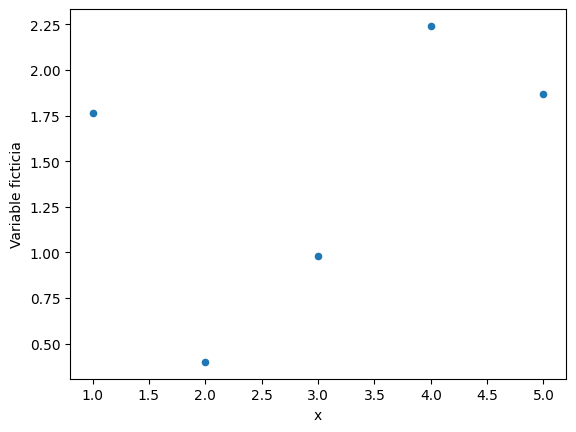

In [ ]:
df.plot(x='x', y='Variable ficticia', kind='scatter') #scatter, bar, barh, box, pie, etc.

# Sin usar pandas:
# plt.scatter(df.x, df.y)

O bien, podemos directamente definir a la variable país como índice del dataframe, lo cuál puede ser muy útil:

Si queremos agregar nuevos datos al dataframe, podemos hacerlo de las siguientes maneras:

In [ ]:
df['variable2'] = df['Variable ficticia']**2
df

,x,Variable ficticia,Variable**2,variable2
0,1,1.764052,3.111881,3.111881
1,2,0.400157,0.160126,0.160126
2,3,0.978738,0.957928,0.957928
3,4,2.240893,5.021602,5.021602
4,5,1.867558,3.487773,3.487773


Si queremos seleccionar un subconjunto de países, podríamos hacer lo siguiente:

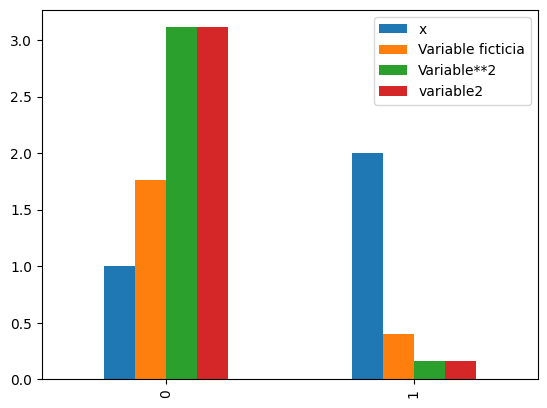

In [ ]:
df.loc[[0,1]].plot(kind='bar')

### Seaborn

### Bokeh

Veamos esto con un conjunto de datos más interesante. Usamos la base de datos de "Per capita gross domestic product" (GDP) ) de [The Maddison Project](https://www.rug.nl/ggdc/historicaldevelopment/maddison/original-maddison):  

In [ ]:
import os

pathout = './data/'

if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)

try:
    # Busca en la carpeta pathout si está el archivo
    maddison_new = pd.read_stata(pathout + 'Maddison2018.dta')
    maddison_new_region = pd.read_stata(pathout + 'Maddison2018_region.dta')
except:
    # Si no está, lo trae de la web y lo guarda dentro de la carpeta pathout.
    maddison_new = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018.dta')
    maddison_new.to_stata(pathout + 'Maddison2018.dta', write_index=False, version=117)
    maddison_new_region = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_region_data.dta')
    maddison_new_region.to_stata(pathout + 'Maddison2018_region.dta', write_index=False, version=117)

In [ ]:
maddison_new_region

,region,region_name,year,cgdppc,rgdpnapc,pop
0,af,Africa,1870.0,NaN,NaN,NaN
1,af,Africa,1871.0,NaN,NaN,NaN
2,af,Africa,1872.0,NaN,NaN,NaN
3,af,Africa,1873.0,NaN,NaN,NaN
4,af,Africa,1874.0,NaN,NaN,NaN
...,...,...,...,...,...,...
1034,wd,World,2012.0,13821.0,13818.0,6992923.0
1035,wd,World,2013.0,14038.0,14090.0,7072213.0
1036,wd,World,2014.0,14261.0,14376.0,7152269.0
1037,wd,World,2015.0,14500.0,14616.0,7231375.0


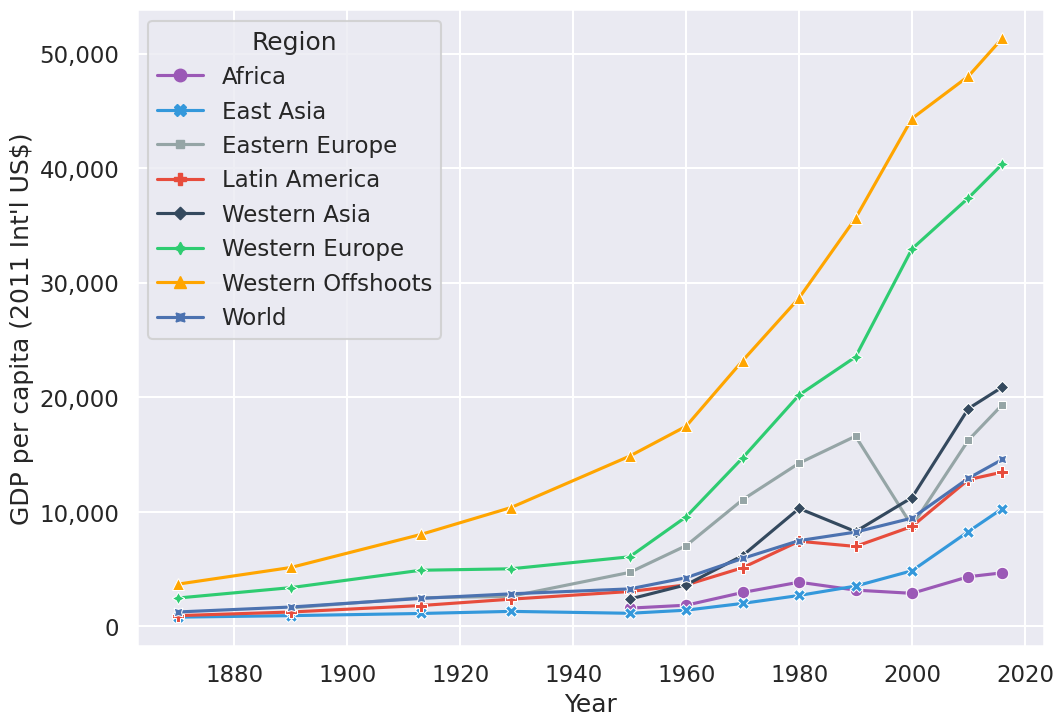

In [ ]:
maddison_new_region['Region'] = maddison_new_region.region_name

mycolors2 = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "orange", "b"]
sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.reset_orig()
sns.set_context("talk")
# Plot
fig, ax = plt.subplots()
sns.lineplot(x='year', y='cgdppc', hue='Region', data=maddison_new_region.loc[(maddison_new_region.year.apply(lambda x: x in [1870, 1890, 1913, 1929,1950, 2016])) | ((maddison_new_region.year>1950) & (maddison_new_region.year.apply(lambda x: np.mod(x,10)==0)))], alpha=1, palette=sns.color_palette(mycolors2), style='Region', dashes=False, markers=True,)
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
#ax.legend(title='', prop={'size': 40})
ax.set_xlabel('Year')
ax.set_ylabel('GDP per capita (2011 Int\'l US$)')
plt.savefig(pathgraphs + 'y1870-2016.pdf', dpi=300, bbox_inches='tight')

In [ ]:
maddison_new_region

,region,region_name,year,cgdppc,rgdpnapc,pop,Region
0,af,Africa,1870.0,NaN,NaN,NaN,Africa
1,af,Africa,1871.0,NaN,NaN,NaN,Africa
2,af,Africa,1872.0,NaN,NaN,NaN,Africa
3,af,Africa,1873.0,NaN,NaN,NaN,Africa
4,af,Africa,1874.0,NaN,NaN,NaN,Africa
...,...,...,...,...,...,...,...
1034,wd,World,2012.0,13821.0,13818.0,6992923.0,World
1035,wd,World,2013.0,14038.0,14090.0,7072213.0,World
1036,wd,World,2014.0,14261.0,14376.0,7152269.0,World
1037,wd,World,2015.0,14500.0,14616.0,7231375.0,World


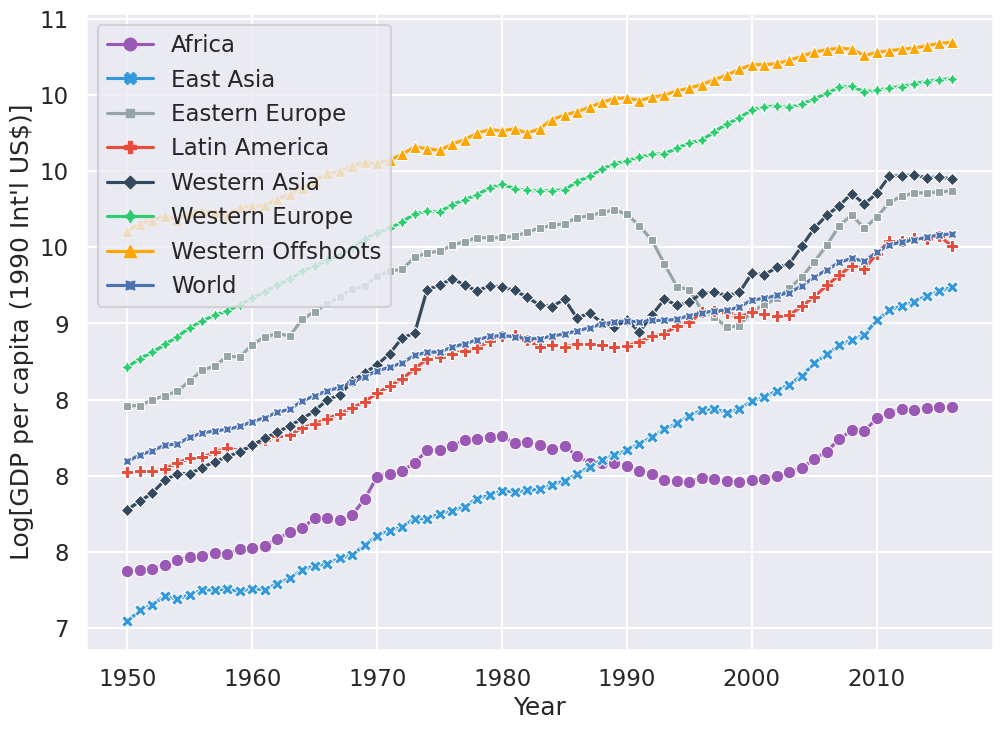

In [ ]:
maddison_new_region['lgdppc'] = np.log(maddison_new_region.cgdppc)

# Select some colors
mycolors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "orange", "b"]
# Use seaborn to setup a color map to be used by matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())

sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.reset_orig()
sns.set_context("talk")
# Plot
fig, ax = plt.subplots()
sns.lineplot(x='year', y='lgdppc', hue='Region', data=maddison_new_region.loc[(maddison_new_region.year>=1950)].reset_index(drop=True), alpha=1, palette=sns.color_palette(mycolors), style='Region', dashes=False, markers=True,)
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(loc='upper left')
ax.set_xlabel('Year')
ax.set_ylabel('Log[GDP per capita (1990 Int\'l US$)]')
plt.savefig(pathgraphs + 'sg1950-2000.pdf', dpi=300, bbox_inches='tight')

# Bibliografía 

- [1] [Fundamentals of Data visualization, Claus O. Wilke](https://clauswilke.com/dataviz/)

- [2] [Coding for Economist, Arthur Turrell](https://aeturrell.github.io/coding-for-economists/intro.html)

- [3] [Intro a Python del Insituto Balseiro, Juan Fiol](https://fiolj.github.io/intro-python-IB)

- [4] [Python for Data Science, Arthur Turrell](https://aeturrell.github.io/python4DS/introduction.html)

[bokeh](https://notebooks.gesis.org/binder/jupyter/user/bokeh-bokeh-notebooks-8452t79o/notebooks/tutorial/11%20-%20Running%20Bokeh%20Applications.ipynb)

[ejemplo dashboard](https://github.com/bokeh/bokeh/tree/branch-3.0/examples/app/dash)